In [32]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import shapely
from geopy import distance

sns.set()

Importando todos los datos necesarios

In [2]:
t_publico = gpd.read_file("CDMX-info/estaciones-paradas-y-terminales-del-sistema-de-transporte-unificado.geojson")
r_inundacion = gpd.read_file("CDMX-info/inundaciones.geojson")
r_sismo = gpd.read_file("CDMX-info/risegos-sismo.geojson")
#zoneo = gpd.read_file("CDMX-info/uo-de-suelo.geojson")

Limpieza de t_publico

In [3]:
t_publico.drop(columns=[ "wheelchair_boarding", "location_type" ], inplace=True)
t_publico.rename(columns={"stop_lat":"lat", "stop_lon":"lng"}, inplace=True)

t_publico.dtypes

lat          float64
lng          float64
stop_id        int64
stop_desc     object
stop_name     object
geometry      object
dtype: object

Limpieza de r_inundacion

In [4]:
r_inundacion.drop(columns=["entidad", "perime_m", "alcaldia", "id", "cvegeo",
                          "fuente", "int2", "area_m2"], inplace=True )
r_inundacion["r_p_v_e"] = r_inundacion["r_p_v_e"].astype("category")
r_inundacion["intensidad"] = r_inundacion["intensidad"].astype("category")

r_inundacion.dtypes

intens_uni      object
intensidad    category
period_ret      object
r_p_v_e       category
descripcio      object
intens_num      object
taxonomia       object
fenomeno        object
geometry        object
dtype: object

Limpieza de r_sismo

In [5]:
r_sismo.drop(columns=["entidad", "perime_m", "id", "cvegeo", "fuente", "int2", "area_m2"  ], inplace=True)
r_sismo["intensidad"] = r_sismo["intensidad"].astype("category")
r_sismo["r_p_v_e"] = r_sismo["r_p_v_e"].astype("category")

r_sismo.dtypes

alcaldia        object
intensidad    category
r_p_v_e       category
descripcio      object
taxonomia       object
fenomeno        object
geometry        object
dtype: object

Limpieza de zoneo

In [7]:
'''
zoneo.drop(columns=["cuenta_catastral", "latitud", "liga_ciudadmx", "altura", "coordenadas", "superficie", "longitud" ], inplace=True)

zoneo.dtypes
'''

'\nzoneo.drop(columns=["cuenta_catastral", "latitud", "liga_ciudadmx", "altura", "coordenadas", "superficie", "longitud" ], inplace=True)\n\nzoneo.dtypes\n'

Distancias tomadas con Haversine

$$ d = 2 r \arcsin \left( \sqrt { \sin ^ { 2 } \left( \frac { \varphi _ { 2 } - \varphi _ { 1 } } { 2 } \right) + \cos \left( \varphi _ { 1 } \right) \cos \left( \varphi _ { 2 } \right) \sin ^ { 2 } \left( \frac { \lambda _ { 2 } - \lambda _ { 1 } } { 2 } \right) } \right) $$

Usamos una función vectorizada para hacer más eficiente

In [34]:
itam = (19.344898, -99.199923)

def haversine(lat1, lon1, lat2, lon2):
    miles_constant = 6372
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    mi = miles_constant * c
    return mi

In [35]:
t_publico["dist"] = haversine(itam[0], itam[1], t_publico["lat"], t_publico["lng"])

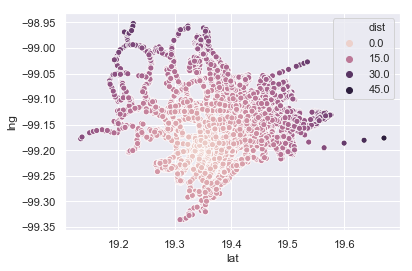

In [37]:
sns.scatterplot(x="lat", y="lng", hue="dist", data=t_publico)

In [43]:
t_publico.describe()

,lat,lng,stop_id,dist
count,6021.000000,6021.000000,6021.000000,6021.000000
mean,19.392115,-99.142398,35912.342302,12.445472
std,0.077827,0.068062,37607.603007,5.917948
min,19.133188,-99.335761,14050.000000,0.385879
25%,19.343521,-99.187210,17915.000000,7.706246
50%,19.393724,-99.142685,20896.000000,12.450045
75%,19.450892,-99.101197,28639.000000,17.026281
max,19.669948,-98.952012,136395.000000,36.235959


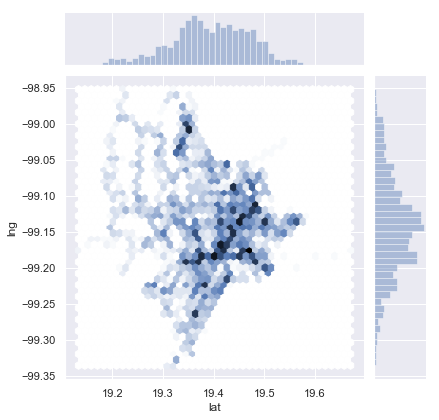

In [46]:
sns.jointplot(t_publico.lat, t_publico.lng, kind="hex")